In [69]:
betawatchpc <- c(0,0.5,0.8)
sig <- seq(0.01,0.05,0.01) 
rej.rate <- matrix(NA,length(betawatchpc),length(sig))
#rej.rate2 <- matrix(NA,length(betawatchpc),length(sig))
betaco <- c(-6,1.0,0.005)
n <- 1000
no.rep <- 100
n.max <- 100
tol <- 1e-9


for(betaloop in 1:length(betawatchpc)){ # the 1st loop
    
    pvalue <- c()
    
    #pvalueLm <- c()
    for(i in 1:no.rep){
        set.seed(i)
        gpa <- rnorm(n,3.1,0.3)
        gre <- rnorm(n,580,80) 
        x.beta <- betaco[1]+betawatchpc[betaloop]*gpa+betaco[3]*gre
        pi.admit <- exp(x.beta)/(1+exp(x.beta))
        Y <- c()
        for (j in 1:n){
            Y[j] <- sample(c(0,1),1,c(1-pi.admit[j],pi.admit[j]),replace=F)        
        }    
        X <- cbind(rep(1,length(Y)),gpa,gre)
        
        betacoef <- c(0,0,0)
        pil <- exp(X %*% betacoef)/(1+exp(X %*% betacoef))
        grad <- t(X) %*% (Y-pil)
        hess <- -t(X) %*% diag(c(pil*(1-pil)),length(Y)) %*% X
        n.iter <- 0
        while ((max(abs(grad))> tol) & (n.iter < n.max) ) {
            betacoef <- betacoef - solve(hess) %*% grad
            pil <- exp(X %*% betacoef)/(1+exp(X %*% betacoef))
            grad <- t(X)%*%(Y-pil)
            hess <- -t(X) %*% diag(c(pil*(1-pil)),length(Y)) %*% X
            n.iter <- n.iter + 1
        }
        if (n.iter== n.max) {
            cat("fail to converge\n")
        } else {
            MLE <- betacoef           
            pvalue[i] <-(1-pt(abs(MLE[2]/sqrt(-solve(hess)[2,2])),n-3))*2
            #pvalueLm[i] <- summary(glm(Y~gpa+gre,family=binomial))$coef [2,4]
        }
        for(k in 1:length(sig)){
            rej.rate[betaloop,k] <- sum(pvalue<sig[k])/no.rep # calculate rejection rate
            #rej.rate2[betaloop,k] <- sum(pvalueLm<sig[k])/no.rep # calculate rejection rate
        }
    }


}
rej.rate

0.01,0.01,0.03,0.04,0.04
0.14,0.21,0.25,0.29,0.38
0.85,0.89,0.93,0.93,0.94


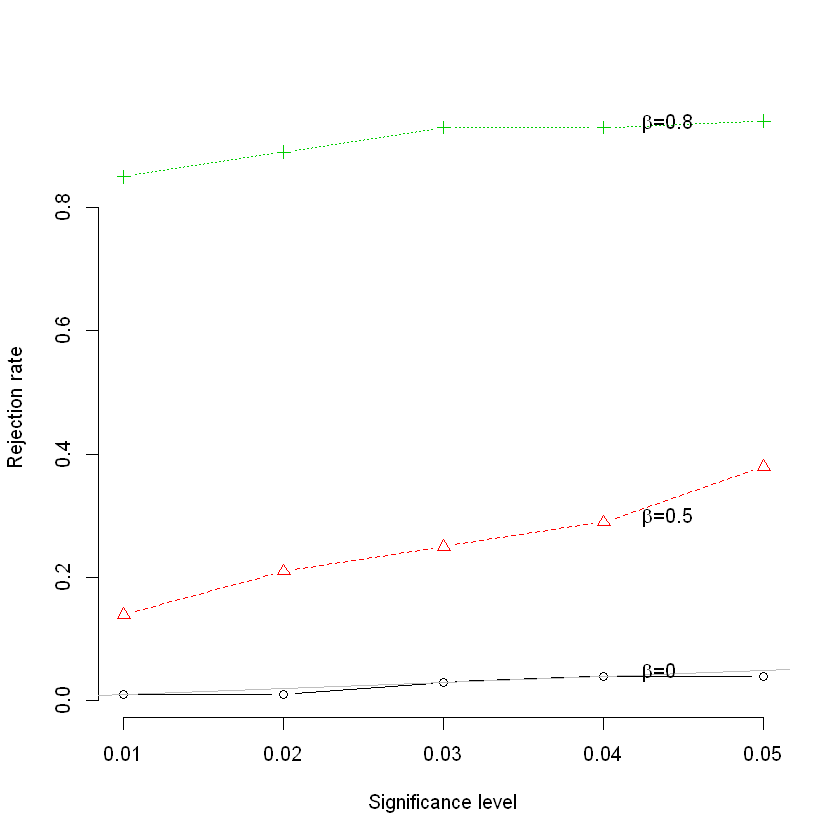

In [71]:
matplot(sig,t(rej.rate),col=c(1:length(betawatchpc)),pch=c(1:length(betawatchpc)),lty=c(1:length(betawatchpc)),
        type="b",frame=F,xlab="Significance level",ylab="Rejection rate")
abline(a=0,b=1,col=8)
legend(0.04,rej.rate[1,4]+0.05,expression(paste(beta,'=0')),bty="n")
legend(0.04,rej.rate[2,4]+0.05,expression(paste(beta,'=0.5')),bty="n")
legend(0.04,rej.rate[3,4]+0.05,expression(paste(beta,'=0.8')),bty="n")